## 1. 딥러닝 프레임워크 
딥러닝 프레임워크는 왜 필요할까요?

딥러닝을 하기 위해선 이런 것들이 필요합니다. 
- 역전파 기능
- 모델을 gpu에서 돌릴 수 있도록 하는 기능 
- 데이터를 gpu에 올리는 기능
- 모델 구조를 구현
- 역전파할 때의 optimizer
- learning rate 조정을 할 수 있는 scheduler
- 기타 등등...

이것들을 매번 구현하기에는 시간도 오래걸리고 매번 효율화를 할 수 없습니다.<br>
그래서 우리는 딥러닝 프레임워크를 사용하면 미리 정의된 클래스, 메소드를 사용하여 **비교적 간단하게(!)**구현할 수 있습니다<br>
대표적인 프레임워크로는 tensorflow와 pyTorch가 있습니다

## 2. tensorflow vs. torch

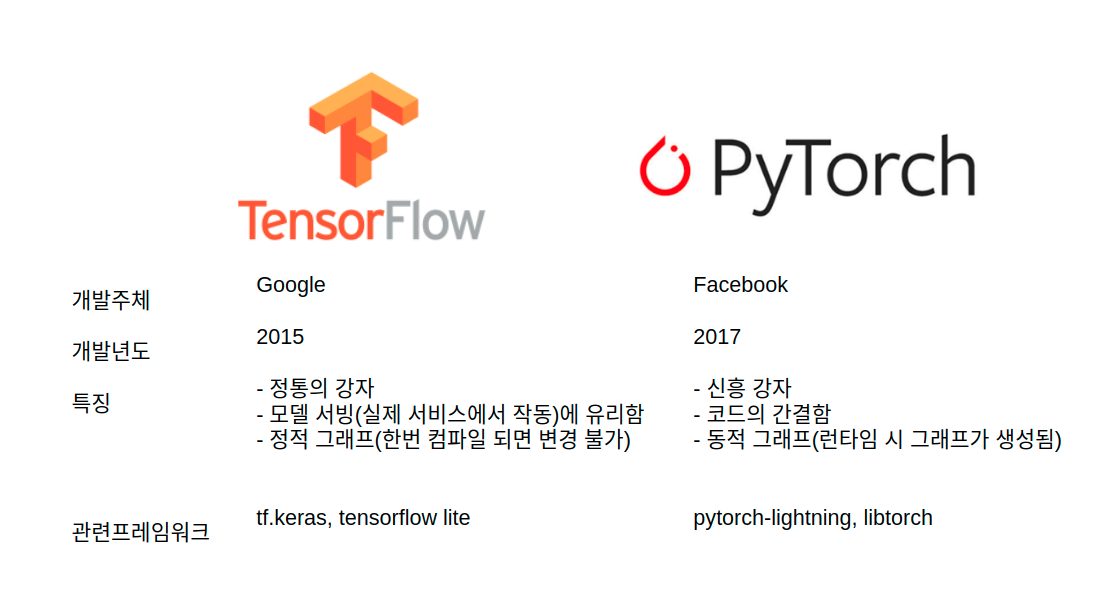

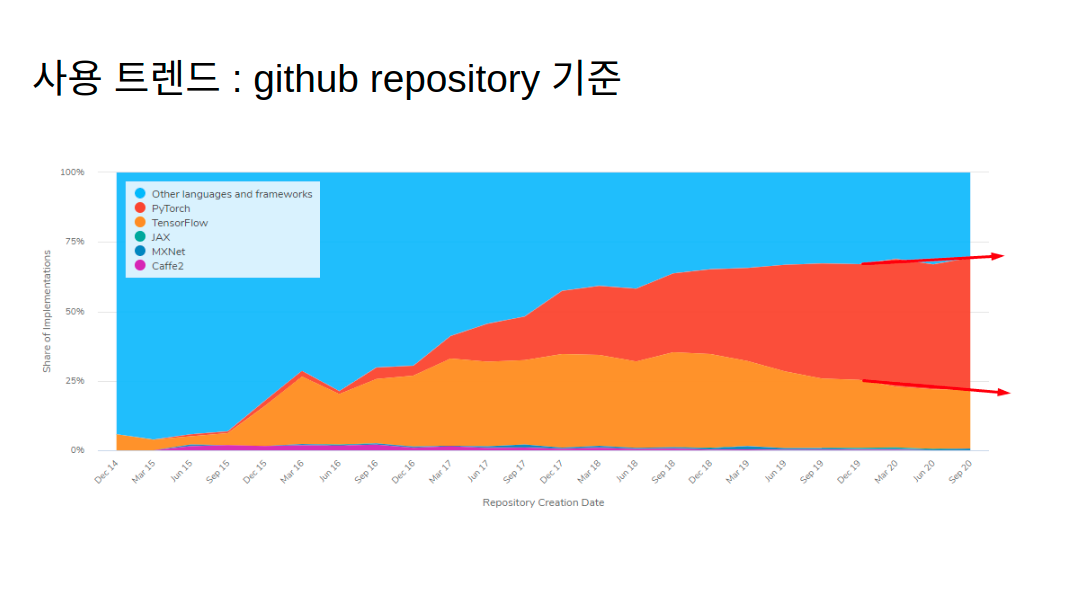

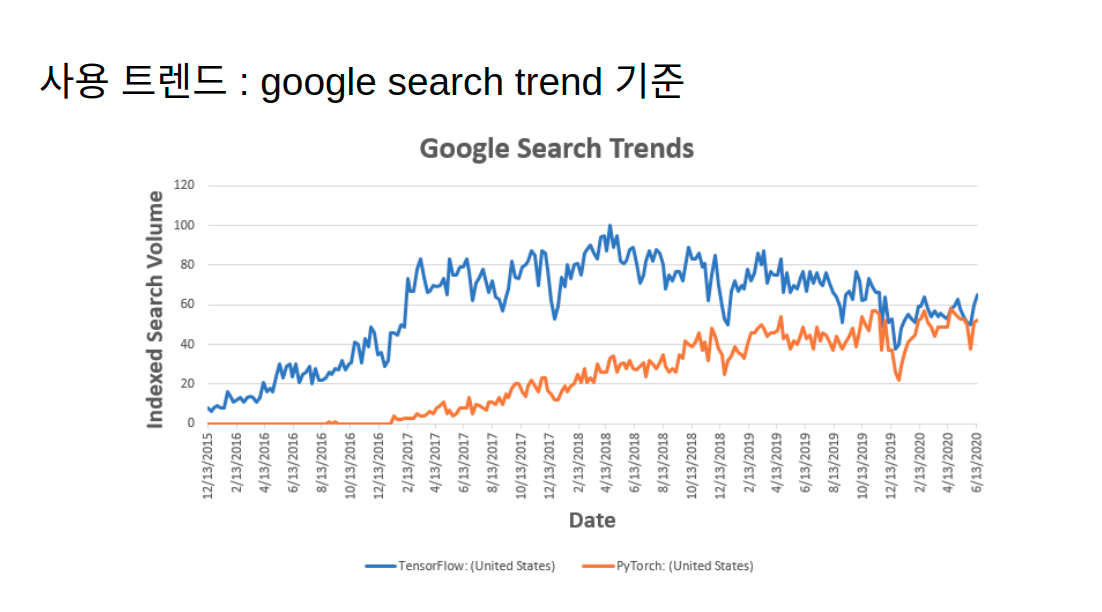

## 3. torch 기본 텐서조작 

torch의 자료형으로는 tensor가 있습니다. tensor는 기본적으로 numpy.array와 유사하며 메소드도 공유하고 있습니다.<br>
numpy.array를 잠깐 복습해봅시다.

In [1]:
import torch
import numpy as np

In [2]:
X = np.array([[0, 1, 0], [0, 0, 0]])
print(X) 
print(X.shape)

[[0 1 0]
 [0 0 0]]
(2, 3)


In [3]:
X = np.zeros((2, 5))
print(X)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### 문제 1: 2 by 3 np.array를 1 by 6으로 만들어보세요
**hint : reshape**

In [4]:
# X.reshape((-1, 6))

이 때 shape이 (1, 6)과 (6,)은 다름을 알아둡시다! 

In [5]:
np.ones(6), np.ones((1, 6))

(array([1., 1., 1., 1., 1., 1.]), array([[1., 1., 1., 1., 1., 1.]]))

torch의 tensor는 이와 매우 유사합니다. 이 때, torch.Tensor와 torch.tensor는 사용법이 다름을 유의합시다

In [6]:
X = torch.Tensor(3, 5) # 3 by 5 random tensor생성, np.random.rand와 같은 기능
X

tensor([[-4.9748e-16,  4.5874e-41, -4.9748e-16,  4.5874e-41,  1.0266e-10],
        [ 3.0763e-41,  1.0266e-10,  3.0763e-41,  1.8015e+25,  1.0266e+04],
        [ 3.1012e+27,  7.1941e+28,  4.9657e+28,  7.2053e+22,  4.7428e+30]])

In [7]:
X = torch.tensor([3, 6]) # torch.tensor는 리스트나 어레이를 받아 텐서로 만들어줍니다
X

tensor([3, 6])

numpy.array를 torch의 tensor로, 또 torch의 tensor를 numpy.array로 옮길 수 있습니다

In [8]:
np_x = np.ones((3, 5))
print(np_x)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [9]:
torch_x = torch.from_numpy(np_x)
print(torch_x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)


tensor에도 다양한 메소드가 있습니다. 그 중 가장 많이 쓰이는 것 위주로 배워봅시다.<br> 외의 메소드에 대해서는 공식 문서를 참고합시다.
https://pytorch.org/docs/stable/tensors.html

### squeeze / unsqueeze
squeeze와 unsqueeze는 차원을 줄이거나 늘릴 때 사용하는 메소드입니다

In [10]:
print(torch_x.shape)
torch_x = torch_x.unsqueeze(0)
print(torch_x.shape)         # unsqueeze는 입력으로 받은 차원을 하나 더 생성해줍니다
torch_x = torch_x.squeeze(0) # squeeze는 입력으로 받은 차원의 크기 1이라면 차원을 제거해줍니다
print(torch_x.shape) 
torch_x = torch_x.squeeze(1) # 차원의 크기가 1이 아니라면 제거할 수 없습니다
print(torch_x.shape) 

torch.Size([3, 5])
torch.Size([1, 3, 5])
torch.Size([3, 5])
torch.Size([3, 5])


### transpose / permute
transpose와 permute는 차원의 위치를 변경하는데 사용됩니다

In [11]:
torch_x = torch_x.permute(1, 0) # 1번째 차원을 0번째 차원으로, 0번째 차원을 1번째 차원으로
print(torch_x.shape)
      
torch_x = torch_x.transpose(1, 0) # 1번째 차원을 0번째 차원으로, 0번빼 차원을 1번째 차원으로
print(torch_x.shape)

torch.Size([5, 3])
torch.Size([3, 5])


### view
np.array의 reshape과 비슷합니다. 그러나 작동방식이 쭉 한줄로 펼친 후 shape에 맞게 자르는 것임에 주의합니다. <br>
그래서 view의 사용은 최대한 자제하는 것이 좋습니다.

In [12]:
x = torch.arange(1, 13)
print(x)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


In [13]:
x_2_6 = x.view(2, 6)
x_2_6

tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])

In [14]:
x_2_6.view(6, 2)

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]])

### 문제 2 : x_2_6을  위와 같이 만드려면 어떻게 해야할까요?
tensor([[ 1,  7],<br>
        [ 2,  8],<br>
        [ 3,  9],<br>
        [ 4, 10],<br>
        [ 5, 11],<br>
        [ 6, 12]])<br>
**hint :** 방금 배움

In [15]:
# x_2_6.transpose(1, 0)

## 4. Neural Network 
이제 뉴럴 네트워크를 만들어봅시다<br>
Fully Connected Network를 사용하여 가상의 데이터 분포를 근사하는 모델을 만들어봅시다 

In [16]:
from torch import nn
from torch.nn import MSELoss
import torch
import matplotlib.pyplot as plt

## 네트워크 쌓기
torch는 `nn.Module`이라는 클래스를 상속하여 간단하게 모델을 만들 수 있습니다.<br>
오늘은 첫 시간이니, FCN를 쌓을 수 있는 `nn.Linear`와 활성화 함수인 `nn.ReLU`를 활용하여 아주 간단한 네트워크를 쌓을 겁니다.<br>
네트워크를 쌓을 때는 항상 input의 차원을 잘 확인하여 정의하는 것이 가장 중요합니다.

## `nn.Linear`
`nn.Linear`는 FCN을 간단하게 짤 수 있습니다.<br>
처음에 정의할 때는 **torch.nn.Linear(입력값의 차원, 출력값의 차원)** 를 받습니다.


In [17]:
# 컬럼이 5개인 데이터가 10개 있는 상황입니다
X = torch.Tensor(10, 5) 

In [18]:
# 컬럼 5개에 weight를 곱한 뒤 3개의 output_dim으로 내보내는 층입니다
linear = nn.Linear(5, 3) 

In [32]:
# Y = WX 로 결과값은 아래와 같이 되게 됩니다
Y = linear(X)
print(Y, Y.shape)

tensor([[ 0.1593, -0.5478,  0.1058],
        [-0.0411, -0.1632, -0.0627],
        [ 0.2661, -0.4956, -0.1477],
        [-0.1811, -0.2290,  0.0388],
        [ 0.2599,  0.0160, -0.0235],
        [ 0.4352, -0.0780, -0.1225],
        [ 0.1895, -0.0610, -0.1734],
        [-0.2371, -0.0582,  0.1770],
        [ 0.1860, -0.4252, -0.0336],
        [-0.0912, -0.1815,  0.1933]], grad_fn=<AddmmBackward>) torch.Size([10, 3])


# `nn.ReLU`
뉴럴 네트워크가 학습이 가능한 것은 단순 선형결합이 아닌 활성화함수(activation function)이라고 하는 비선형 함수를 사용하기 때문입니다.<br> 
ReLU의 수식은 아주 간단합니다. $$ReLU(x) = max(0, x)$$<br>
바로 0 이상은 그대로 출력하고 0 이하는 0으로 바꿔버리는 활성화 함수입니다. 그래프는 아래와 같이 생겼습니다.<br>

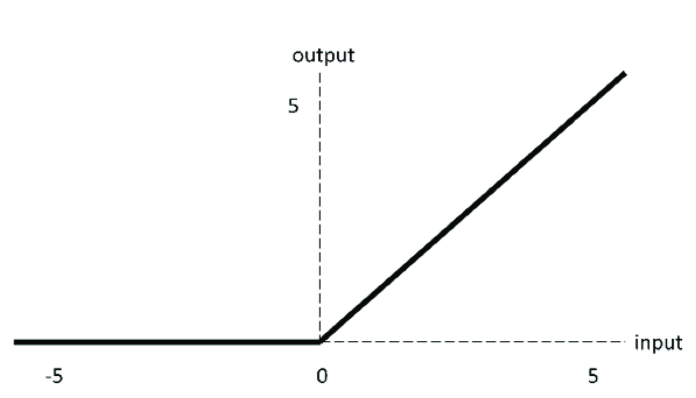

In [19]:
# 컬럼이 5개인 데이터가 10개 있는 상황입니다
X = torch.rand(10, 5) 
print(X) # 모두 양수입니다

tensor([[0.8363, 0.6082, 0.9646, 0.5776, 0.2211],
        [0.8283, 0.9982, 0.3365, 0.8667, 0.1825],
        [0.1015, 0.1257, 0.4906, 0.3752, 0.5536],
        [0.4452, 0.3340, 0.3678, 0.5492, 0.2860],
        [0.3185, 0.2505, 0.9101, 0.7060, 0.5869],
        [0.6801, 0.5036, 0.1894, 0.3850, 0.8624],
        [0.4269, 0.2656, 0.9594, 0.6004, 0.3602],
        [0.1675, 0.9800, 0.9346, 0.1240, 0.9169],
        [0.5234, 0.5332, 0.6439, 0.7234, 0.3395],
        [0.0707, 0.9640, 0.2155, 0.8899, 0.1572]])


In [20]:
# ReLU의 효과를 보기위해서 [-1 ~ 1] 사이의 uniform distribution으로 바꿔줍시다.
# torch에서 메소드 뒤에 _가 붙으면 그 자체를 바꿔주어서 
# X = X.uniform_(.,,) 과 같이 적지 않아도 됩니다
X.uniform_(-1, 1)
print(X) # 이제는 음수와 양수가 있는 것을 볼 수 있습니다 

tensor([[ 0.0154, -0.6509, -0.9681, -0.0064, -0.3443],
        [-0.6132,  0.3257,  0.4349, -0.4237, -0.7811],
        [ 0.9662, -0.4729,  0.4045,  0.7324, -0.2566],
        [-0.3250,  0.6270,  0.5003,  0.3240, -0.7790],
        [ 0.1595, -0.6438,  0.9118,  0.9806,  0.7503],
        [ 0.2530, -0.8959,  0.5224, -0.4877,  0.8735],
        [-0.6603, -0.5352,  0.7104,  0.8444, -0.7432],
        [-0.3077,  0.8675,  0.6059, -0.2625,  0.1514],
        [ 0.6025, -0.3744,  0.1431,  0.4669, -0.0824],
        [-0.9615, -0.1009, -0.3846,  0.4332, -0.4848]])


In [21]:
relu = nn.ReLU()

In [22]:
relu(X) # ReLU 함수를 거치니 음수는 다 0으로 바뀐 것을 알 수 있습니다

tensor([[0.0154, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3257, 0.4349, 0.0000, 0.0000],
        [0.9662, 0.0000, 0.4045, 0.7324, 0.0000],
        [0.0000, 0.6270, 0.5003, 0.3240, 0.0000],
        [0.1595, 0.0000, 0.9118, 0.9806, 0.7503],
        [0.2530, 0.0000, 0.5224, 0.0000, 0.8735],
        [0.0000, 0.0000, 0.7104, 0.8444, 0.0000],
        [0.0000, 0.8675, 0.6059, 0.0000, 0.1514],
        [0.6025, 0.0000, 0.1431, 0.4669, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.4332, 0.0000]])

# 실전! 네트워크 쌓기
이제 정말 네트워크를 쌓을 시간입니다.<br>
파이토치에서 네트워크를 쌓을 때는 아래와 같은 문법으로 적게 됩니다.

In [23]:
class fcn(nn.Module): 
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        '''
        여기에 두번째 linear 함수를 정의주세요!
        self.fc2 = ...
        '''
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, src):
        output = self.fc1(src) # [batch size, hidden_size]
        output = self.relu(output)
        '''
        여기에 두번째 linear 함수를 쌓아주세요!
        '''
        output = self.fc2(output)
        return output

## 모델 정의

In [24]:
input_dim = 1
hidden_dim = 200
batch_size = 1000
output_dim = 1

In [25]:
model = fcn(input_dim, hidden_dim, output_dim)

## loss, optimizer 정의 

In [26]:
loss = nn.MSELoss()
optim = torch.optim.Adam(model.parameters())

In [27]:
# device = 'cuda'
# model.to(device);

weight를 초기화 해줍니다. 오늘은 uniform distribution으로 초기화합니다.

In [28]:
def initialize_weights(m):
    for name, param in m.named_parameters():
        torch.nn.init.uniform(param.data)

In [29]:
model.apply(initialize_weights);

/home/long8v/anaconda3/envs/long36v/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


## 모델 학습

In [30]:
device ='cpu'

/home/long8v/anaconda3/envs/long36v/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  


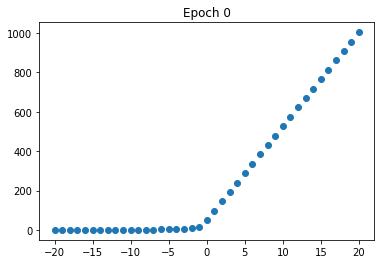

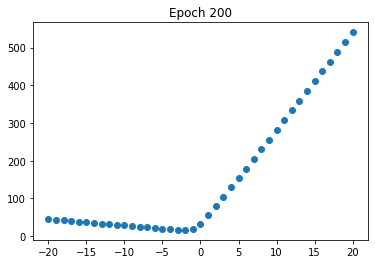

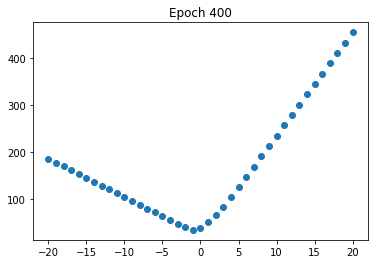

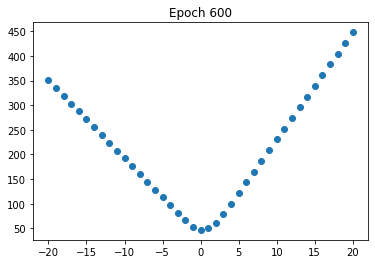

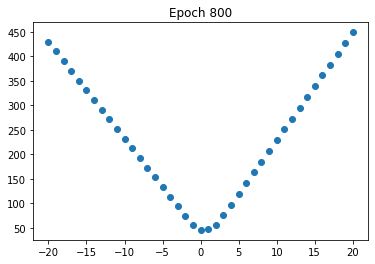

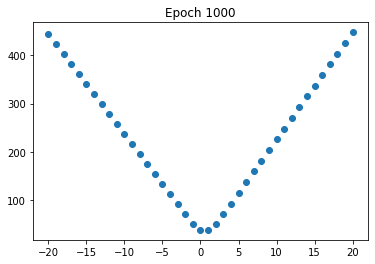

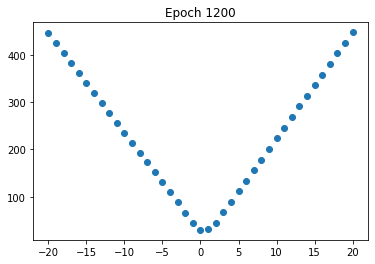

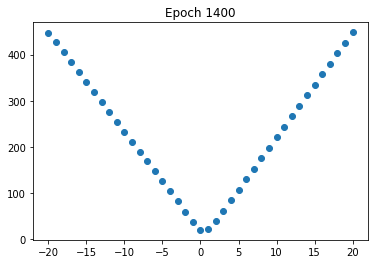

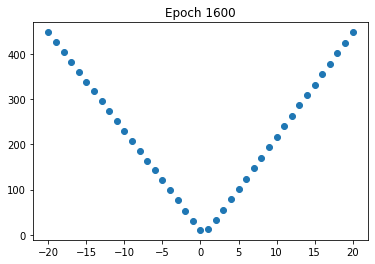

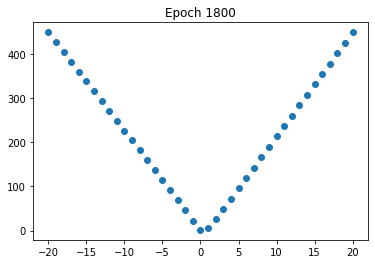

In [31]:
output_list = []
for _ in range(2000):
    optim.zero_grad()
    x = torch.FloatTensor(batch_size, input_dim).uniform_(-30, 30) # batch size, input_dim
    y = x ** 2
    x = x.to(device)
    y = y.to(device)
    output = loss(model(x), y)
    output.backward()
    optim.step()
    if _ % 200 == 0:
        model.eval()
        with torch.no_grad():
            xx = torch.range(-20, 20, 1)
            yy = model(xx.unsqueeze(1).to(device))
            plt.scatter(xx, yy.data.cpu())
            plt.title(f'Epoch {_}')
            plt.show()

## 실습해봅시다 & 생각해봅시다
- `reLU`말고 다른 활성화 함수를 사용해봅시다. 초기 그래프는 어떤 모양으로 그려지나요? 왜 그럴까요?
- 활성화 함수를 빼고 FC1 + FC2 두개로만 학습을 해봅시다. 학습이 잘 되나요? 안된다면 그 이유는 무엇일까요? 자유롭게 생각해봅시다